
-----------------------------------------------------------------------------------------------------------
Authors: Gabriele Pozzato, Anirudh Allam, Simona Onori
Affiliation: Stanford University, Department of Energy Resources Engineering
  
Property of Stanford Energy Control Lab (SECL) - https://onorilab.stanford.edu/ 
-----------------------------------------------------------------------------------------------------------

- General comments:
    - Data are provided in .xlsx (raw) and .mat (processed) form.
    - .mat files are reduced in size and useful for cycling tests.
    - The authors have focused on current and voltage profiles.
    - Additional signals (e.g., temperature) are available in raw data.
    - Sheets 'Dataset_structure' and 'Signals_description' describe the dataset.
    - Sheet 'Cycling_protocol' provides details on the cycling protocol.

- Cell properties:
    - Model/chemistry: LG Chem INR21700-M50T, NMC 
    - Weight: 0.06925kg
    - Size: 21.44mm x 70.80mm 
    - Nominal capacity: 4.85Ah
    - Nominal voltage: 3.63V
    - Charge cutoff voltage: 4.2V
    - Discharge cutoff voltage: 2.5V
    - Cutoff current: 50mA

- Diagnostic tests:
    - HPPC, EIS (@20, 50, 80% SOC), and capacity test (@C/20) data.
    - Diag_#: contains experimental data for diagnostic test #.
    - _processed_mat: contains .mat files for all diagnostic tests.

- Cycling tests:
    - Cycling_#: contains experimental data for cycling test #.
    - _processed_mat: contains processed .mat files.

- Notes:
    - Positive current --> charge, negative current --> discharge.
    - EIS diagnostic tests for W4, W5, W7, and G1 are missing.
    - Only 'Channel*' sheets should be considered for capacity tests, HPPC, and cycling tests.
    - Arbin scheduling issues affected UDDS cycling.
    - Increased output voltage profile observed for some cells due to equipment issues.
    - Some cells have cycling data split into more than one folder.

In the context of the current Jupyter Notebook, we are working with the .mat file `EV_data/W4.mat` which contains processed cycling test data. We have extracted relevant columns and created a pandas DataFrame `df_extracted` for further analysis.

In [4]:
import glob
import numpy as np
import pandas as pd


In [5]:
from scipy.io import loadmat

# Load the .mat file
file_path = "EV_data/W4_C01.mat"
mat_data = loadmat(file_path)

# Display the keys in the .mat file to understand its structure
print(mat_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'I_full_vec_M1_NMC25degC', 'Step_Index_full_vec_M1_NMC25degC', 'V_full_vec_M1_NMC25degC', 'ch_cap_full_vec_M1_NMC25degC', 'dis_cap_full_vec_M1_NMC25degC', 't_full_vec_M1_NMC25degC'])


In [6]:
# Downsample the data by taking every 10th row
columns_of_interest = ['I_full_vec_M1_NMC25degC', 'Step_Index_full_vec_M1_NMC25degC', 'V_full_vec_M1_NMC25degC', 'ch_cap_full_vec_M1_NMC25degC', 'dis_cap_full_vec_M1_NMC25degC', 't_full_vec_M1_NMC25degC']

# Create a dictionary to hold the data
extracted_data = {col: mat_data[col].flatten() for col in columns_of_interest}

# Convert the dictionary to a pandas DataFrame
df_extracted = pd.DataFrame(extracted_data)

# Rename the columns to just have the initial word
df_extracted.rename(columns=lambda x: x.split('_')[0], inplace=True)

print(df_extracted.head())
print(f"Number of samples: {len(df_extracted)}")

     I  Step         V   ch  dis       t
0  0.0     0  0.000000  0.0  0.0  0.0000
1  0.0     1  3.017208  0.0  0.0  0.1006
2  0.0     1  3.017112  0.0  0.0  0.2003
3  0.0     1  3.017092  0.0  0.0  0.3004
4  0.0     1  3.017064  0.0  0.0  0.4002
Number of samples: 7773108


In [7]:
# Downsample the data by taking every 10th row
df_extracted = df_extracted.iloc[::10, :]

print(df_extracted.head())
print(f"Number of samples after downsampling: {len(df_extracted)}")

           I  Step         V        ch       dis        t
0   0.000000     0  0.000000  0.000000  0.000000   0.0000
10  0.000000     1  3.017130  0.000000  0.000000   1.0000
20  4.839508     2  3.423956  0.012094  0.000003  10.0494
30  4.838593     2  3.472899  0.025537  0.000003  20.0505
40  4.837372     2  3.512094  0.038975  0.000003  30.0500
Number of samples after downsampling: 777311


"""
This DataFrame contains the following columns:

- I: Current (A)
- Step: Step number at this point
- V: Voltage (V)
- ch: Charge capacity (Ah) at this point (always positive)
- dis: Discharge capacity (Ah) at this point (always positive)
- t: Time the data is taken, start of each step = 0 (s)
"""


### Next Steps: Visualizing Voltage and Current vs Time

To gain insights into the battery's behavior during the cycling tests, we will visualize the voltage and current over time. This will help us identify patterns and anomalies in the data.

1. **Voltage vs Time**: Plotting the voltage against time will allow us to observe how the voltage changes throughout the cycling process. This can reveal important information about the battery's performance and efficiency.

2. **Current vs Time**: Similarly, plotting the current against time will help us understand the charging and discharging cycles of the battery. This can provide insights into the battery's capacity and health.

In the next cell, we will use `matplotlib` to create these plots.


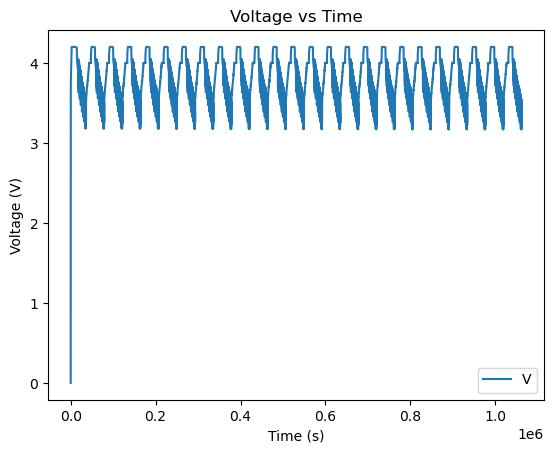

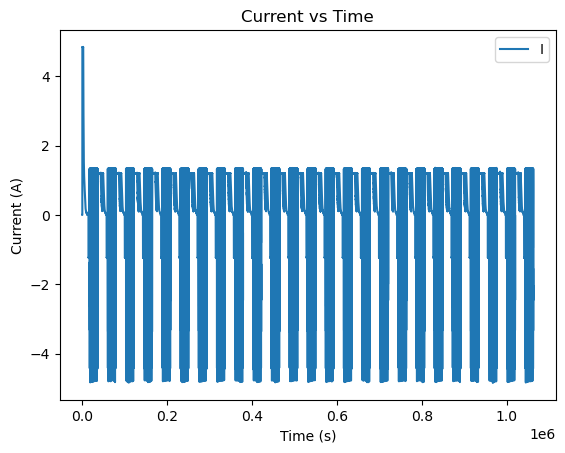

In [9]:
import matplotlib.pyplot as plt

# Plot Voltage vs Time
df_extracted.plot(x='t', y='V', kind='line', title='Voltage vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()

# Plot Current vs Time
df_extracted.plot(x='t', y='I', kind='line', title='Current vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.show()

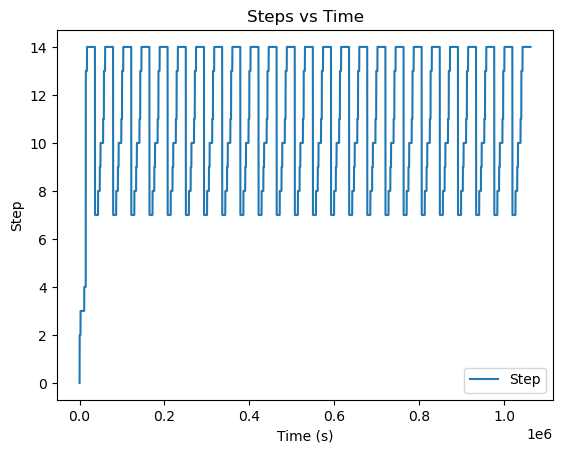

In [10]:
# Plot Steps vs Time
df_extracted.plot(x='t', y='Step', kind='line', title='Steps vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Step')
plt.show()

# Next Steps: Separating and Analyzing Each Cycle Independently

The next processing step involves separating each cycle from the dataset and studying them independently. This will allow us to perform a detailed analysis of each cycle's characteristics and behavior.

### Explanation of the Code

The code snippet provided performs the following tasks:

1. **Create a New Column for Cycle Number:**
   - The code creates a new column named `Cycle` in the DataFrame `df_extracted`.
   - This column is based on the change in the `Step` column from 14 to 7.
   - The expression `df_extracted['Step'].shift(-1) == 7` checks if the next row's `Step` value is 7.
   - The expression `df_extracted['Step'] == 14` checks if the current row's `Step` value is 14.
   - The logical AND (`&`) of these two conditions identifies the points where the `Step` changes from 14 to 7.
   - The `cumsum()` function is then used to create a cumulative sum, effectively assigning a unique cycle number each time the step changes from 14 to 7.

2. **Print the First Few Rows of the DataFrame:**
   - The `print(df_extracted.head())` statement prints the first five rows of the DataFrame to verify the changes.

3. **Plot Cycle vs. Time:**
   - The code plots the `Cycle` column against the `t` (time) column.
   - The `df_extracted.plot()` function is used to create a line plot with `t` on the x-axis and `Cycle` on the y-axis.
   - The plot is titled 'Cycle vs Time'.
   - The x-axis is labeled 'Time (s)' and the y-axis is labeled 'Cycle'.
   - Finally, `plt.show()` is called to display the plot.

This code helps visualize how the cycle number changes over time based on the step transitions in the data.

           I  Step         V        ch       dis        t  Cycle
0   0.000000     0  0.000000  0.000000  0.000000   0.0000      0
10  0.000000     1  3.017130  0.000000  0.000000   1.0000      0
20  4.839508     2  3.423956  0.012094  0.000003  10.0494      0
30  4.838593     2  3.472899  0.025537  0.000003  20.0505      0
40  4.837372     2  3.512094  0.038975  0.000003  30.0500      0


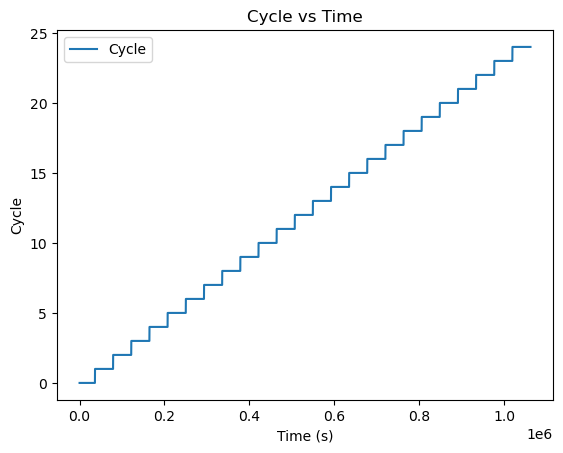

In [11]:

# Create a new column for the cycle number based on step change from 14 to 7
df_extracted['Cycle'] = ((df_extracted['Step'].shift(-1) == 7) & (df_extracted['Step'] == 14)).cumsum()

print(df_extracted.head())


# Plot Cycle vs Time
df_extracted.plot(x='t', y='Cycle', kind='line', title='Cycle vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Cycle')
plt.show()


In [ ]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add traces for each cycle
for cycle in df_extracted['Cycle'].unique():
    cycle_data = df_extracted[df_extracted['Cycle'] == cycle]
    fig.add_trace(go.Scatter(x=cycle_data['t'], y=cycle_data['V'], mode='lines', name=f'Cycle {cycle}', visible=False))

# Make the first cycle visible
fig.data[0].visible = True

# Create and add slider
steps = []
for i, cycle in enumerate(df_extracted['Cycle'].unique()):
    step = dict(
        method='update',
        args=[{'visible': [j == i for j in range(len(df_extracted['Cycle'].unique()))]},
              {'title': f'Voltage vs Time for Cycle {cycle}'}],
        label=str(cycle)
    )
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Cycle: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title='Voltage vs Time with Cycle Slider',
    xaxis_title='Time (s)',
    yaxis_title='Voltage (V)'
)

fig.show()